# Experiment 4 – Sampling 
Generate samples from the RBM

In [22]:

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from rbm_utils import (
    load_digits_data,
    load_model,
    save_model,
    rbm_cd1_train,
    rbm_gibbs_step,
    rbm_reconstruct,
    hamming_error,
)

np.random.seed(3)


In [23]:
target_size = (14, 14)
nv = target_size[0] * target_size[1]
epochs = 30
batch_size = 100
lr = 0.1
weight_decay = 1e-4
X_train, X_test, target_size = load_digits_data(
    target_size=target_size, threshold=0.5, test_size=0.2, seed=1
)
model_path = Path("models/rbm_digits_50.npz")
if not model_path.exists():
    raise FileNotFoundError("models/rbm_digits_50.npz not found")
params_base, target_size = load_model(str(model_path))
print("Loaded base model for sampling.")


Loaded base model for sampling.


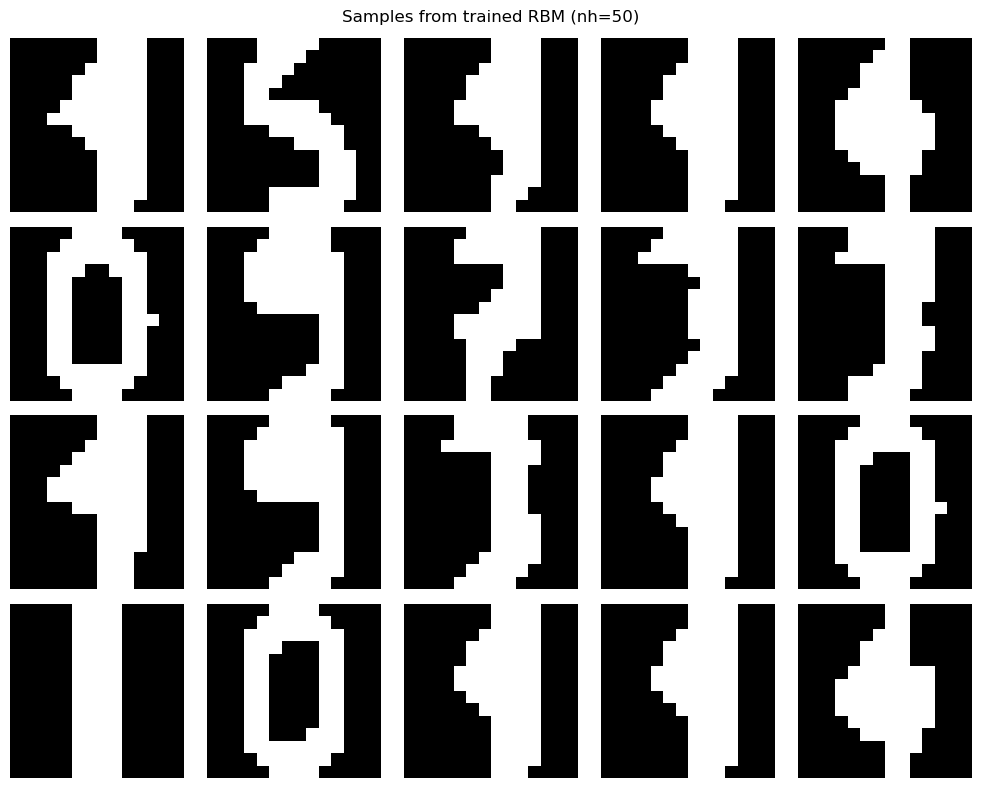

In [24]:
num_samples = 20
gibbs_steps = 500
burn_in = 100
samples = []
for i in range(num_samples):
    v = (np.random.rand(1, nv) < 0.5).astype(np.float32)
    for t in range(gibbs_steps):
        v = rbm_gibbs_step(v, params_base.W, params_base.b, params_base.c)
    samples.append(v.squeeze())
samples = np.array(samples)
rows = 4
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
for idx, ax in enumerate(axes.flat):
    if idx < num_samples:
        ax.imshow(samples[idx].reshape(target_size), cmap="gray", vmin=0, vmax=1)
    ax.axis("off")
plt.suptitle("Samples from trained RBM (nh=50)")
plt.tight_layout()
plt.savefig("rbm_samples_nh50.png")
plt.show()
